# Pascal VOC Dataset

### [Pascal VOC 2012 Data](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/) 다운로드

In [ ]:
# pascal voc 2012 데이터를 다운로드 후 /data 디렉토리에 압축 해제
!mkdir ./data

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C ./data

**다운로드 받은 dataset 확인**  

VOCdevkit
- VOC2012
    - Annotations
        - xml format
        - 개별 xml 파일은 한 개 image에 대한 Annotation 정보를 가짐
        - 이름이 동일한 image(확장자 .jpg)와 mapping
    - JPEGImages
        - Detection과 Segmentation에 사용될 원본 이미지
    - ImageSets
        - 어떤 이미지를 train, test, trainval, val에 사용할 것인지에 대한 mapping 정보
        - 개별 object 별로 해당 파일을 가짐
    - SegmentationObject
        - Instance Segmentation에 사용될 masking 이미지
    - SegmentataionClass
        - Sementic Segmentation에 사용될 masking 이미지

In [3]:
!ls ./data/VOCdevkit/VOC2012
!ls ./data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations        JPEGImages         SegmentationObject
ImageSets          SegmentationClass
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg
ls: stdout: Undefined error: 0


### JPEGImage 디렉토리에 있는 임의의 이미지 보기

image shape:  (281, 500, 3)


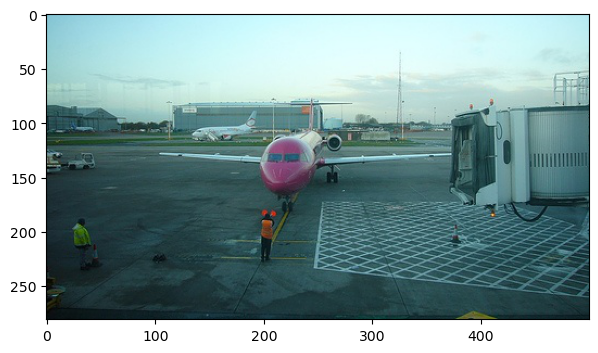

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

img = cv2.imread('./data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape: ', img.shape)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb)
plt.show()

### Annotations 디렉토리에 있는 임의의 annotation 파일 보기
mapping된 동일 이름의 이미지(2007_000032.jpg)에 대한 정보
- filename: mapping된 이미지 파일 이름
- size: 이미지의 너비, 높이, 채널
- segmented: segmatation 정보 존재 여부 (있으면 1, 없으면 0)
- object: 개별 object의 정보
    - bndbox: 개별 object의 bounding box 정보 (xmin, ymin, xmax, ymax)

In [8]:
!cat ./data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

### SegmentationObject 디렉토리에 있는 임의의 masking 이미지 보기

img shape: (281, 500, 3)


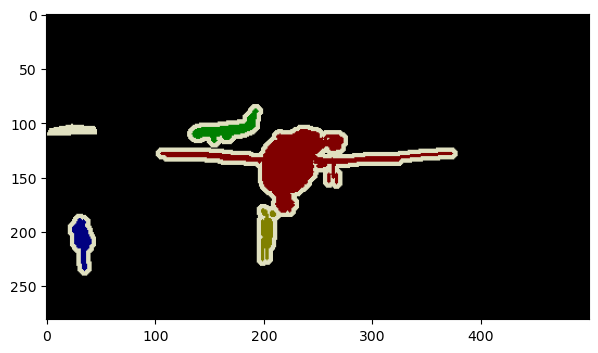

In [4]:
# 이미지 이름과 동일 -> 일대일 mapping 되어 있음
img = cv2.imread('./data/VOCdevkit/VOC2012/SegmentationObject/2007_000032.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb)
plt.show()

### Annotation xml 파일에 있는 요소들을 parsing하여 접근하기

**[lxml](https://lxml.de/) 모듈 설치**
- xml과 html에서의 parsing 기능을 제공하는 라이브러리
- 정형화되지 않은 페이지를 크롤링 할 때 발생하는 에러들을 자동으로 처리해줌
- xml 모듈을 이용하여 xml 분석 중에 lxml 에러 발생 시, lxml 모듈 사용하여 진행하면 됨
    - xml 모듈  
        : python에서 xml 데이터를 처리하기 위한 모듈  
        : 별도의 설치 과정 필요 없음  
        : ElementTree 클래스는 XML 트리를 생성하고 조작하는 클래스  
        : Element 클래스는 XML 요소를 나타내는 클래스  

In [13]:
!pip install lxml

zsh:1: command not found: pip


**parsing하여 접근하기** 

xml은 트리(tree) 형태의 계층 구조를 갖기 때문에 파싱 시, xml 패키지 이용

In [5]:
import os
import xml.etree.ElementTree as ET

ANNO_DIR = './data/VOCdevkit/VOC2012/Annotations' # Annotation 디렉토리의 상대경로
IMAGE_DIR = './data/VOCdevkit/VOC2012/JPEGImages' # JPEGImage 디렉토리의 상대경로

# os.listdir(path): 지정한 디렉토리 내의 모든 파일 및 디렉토리를 리스트에 저장하여 리턴
xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5])
print(len(xml_files))

['2011_006135.xml', '2008_006482.xml', '2010_005054.xml', '2010_005732.xml', '2011_004044.xml']
17125


In [6]:
# 임의의 xml 파일 parsing
xml_file = os.path.join(ANNO_DIR, '2007_000032.xml') # 2007_000032.xml의 상대 경로

# xml 파일을 parsing하여 element 생성
tree = ET.parse(xml_file) # tree 생성
root = tree.getroot() # 루트 설정 -> annotataion

# image 관련 정보는 root의 자식으로 존재
image = root.find('filename').text
image_path = os.path.join(IMAGE_DIR, image)
image_size = root.find('size') 
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# 파일 내에 있는 모든 object element 찾음
objects_list = []
for obj in root.findall('object'):
    # bounding box 좌표
    xmlbox = obj.find('bndbox')
    
    xmin = int(xmlbox.find('xmin').text)
    ymin = int(xmlbox.find('ymin').text)
    xmax = int(xmlbox.find('xmax').text)
    ymax = int(xmlbox.find('ymax').text)
    
    bound_pos = (xmin, ymin, xmax, ymax)
    
    # object의 이름(class)
    class_name = obj.find('name').text
    
    # object_list의 각 요소들은 딕셔너리
    object_dict = {'class_name': class_name, 'bound_pos': bound_pos}
    objects_list.append(object_dict)
    
print('image_path: ', image_path, '\n', 'image_size: ', (image_width, image_height))

for obj in objects_list:
    print(obj)

image_path:  ./data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size:  (500, 281)
{'class_name': 'aeroplane', 'bound_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bound_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bound_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bound_pos': (26, 189, 44, 238)}


### Annotation 내의 object들의 bounding box 정보를 이용하여 bounding box 시각화

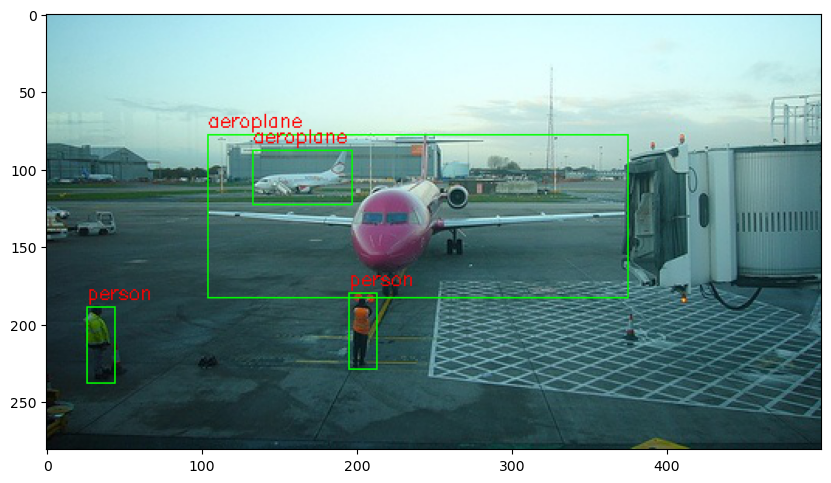

In [7]:
import cv2
import os
import xml.etree.ElementTree as ET
%matplotlib inline

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
image_path = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(image_path) # bgr
draw_img = img.copy()
# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    # 좌상단
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    # 우하단
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show()